In [1]:
import numpy as np
import pandas as pd
from astropy.nddata import NDDataArray,StdDevUncertainty
import astropy.units as u
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import importlib

import sys
sys.path.append("../")
from src.JacobianVisualizer import *
from src.JacobianComputer import compute_jacobian

# Information Content

## **1. Load Spectral Grid**

In [2]:
# Load or create reference data path
__dataset_path__ = os.getenv("TelescopeML_reference_data")
__folder__ = "training_datasets"

# DataFrame with cols grid points then spectra
__dataset_file__ = "browndwarf_R100_v4_newWL_v3.csv.bz2"
dataset = pd.read_csv(os.path.join(__dataset_path__,__folder__,__dataset_file__), compression='bz2')

# Wavelength grid of model
__wavelength_file__ = "wl.csv"
wl = pd.read_csv(os.path.join(__dataset_path__,__folder__,__wavelength_file__)).to_numpy().squeeze()

## **2. Compute Jacobian Matrix**

Compute estimated partial derivatives to fill each cell of the Jacobian matrix. The dataset should be structured as follows: 

| Param 1     | Param 2     | Param 3     | ... | λ₁         | λ₂         | λ₃         | ... | λₙ         |
|-------------|-------------|-------------|-----|-------------|-------------|-------------|-----|-------------|
| value₁₁     | value₁₂     | value₁₃     | ... | flux₁₁      | flux₁₂      | flux₁₃      | ... | flux₁ₙ      |
| value₂₁     | value₂₂     | value₂₃     | ... | flux₂₁      | flux₂₂      | flux₂₃      | ... | flux₂ₙ      |
| ...         | ...         | ...         | ... | ...         | ...         | ...         | ... | ...         |



## **✅Generalizable: compute_jacobian**
This function can ingest any param grid given good except needs exactly 4 parameters, could easily manually make a few options for 3,4,5 parameters. 

In [ ]:
temperature_jacobian = compute_jacobian(dataset,
                                        wl, 
                                        wrt = 'temperature',
                                        save_path = '../jacobians'
                                       )

In [ ]:
gravity_jacobian = compute_jacobian(dataset,
                                        wl, 
                                        wrt = 'gravity',
                                        save_path = '../jacobians'
                                       )

In [ ]:
metallicity_jacobian = compute_jacobian(dataset,
                                        wl, 
                                        wrt = 'metallicity',
                                        save_path = '../jacobians'
                                       )

In [ ]:
c_o_ratio_jacobian = compute_jacobian(dataset,
                                        wl, 
                                        wrt = 'c_o_ratio',
                                        save_path = '../jacobians'
                                       )

## **3. Visualize Jacobian**

Check output by taking a look at the Jacobian value by wavelength, compared to the spectra that determined the estimated partial derivative. 

In [5]:
# Load previously ran Jacobian
__load__ = True

parameters = np.array(['gravity',
             'temperature',
             'c_o_ratio',
             'metallicity'])
if __load__:
    matrices_dict = {}
    for wrt in parameters:
        matrix = np.load(f'../jacobians/{wrt}_matrix.npy', allow_pickle=True)
        matrices_dict[wrt] = matrix

### **Needs to be generalized⬇️**
This plotting function just needs to ingest different labels for visualization purposes, it already is structured for any parameter list.

### Temperature

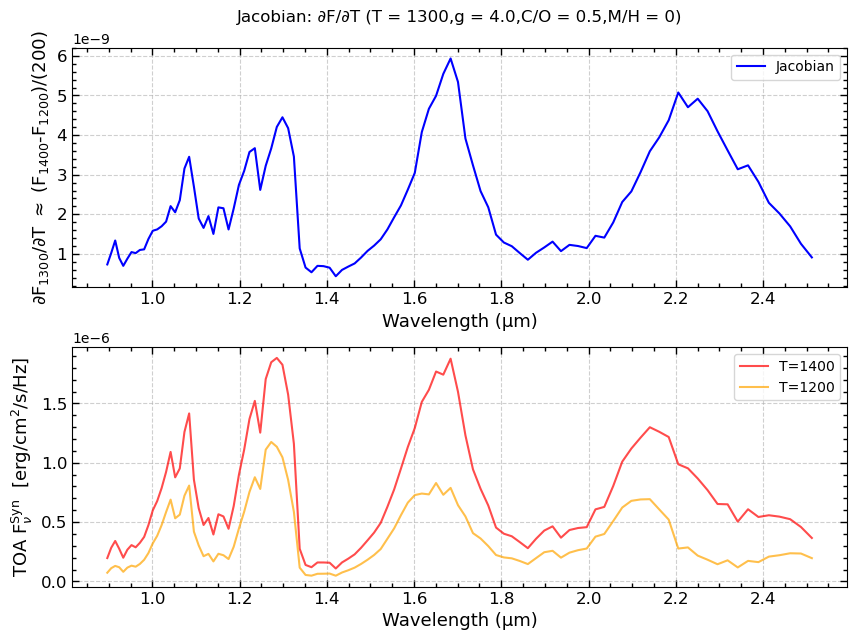

In [7]:
const_dict = {'temperature':1300,
    'gravity':4.0,
    'c_o_ratio':0.5,
    'metallicity':0}

if __load__:
    temperature_jacobian = matrices_dict["temperature"]

delta_flux_delta_J(temperature_jacobian,
                   "temperature",
                   dataset, 
                   wl,
                   const_dict = const_dict,
                   logscale=False)

### Gravity

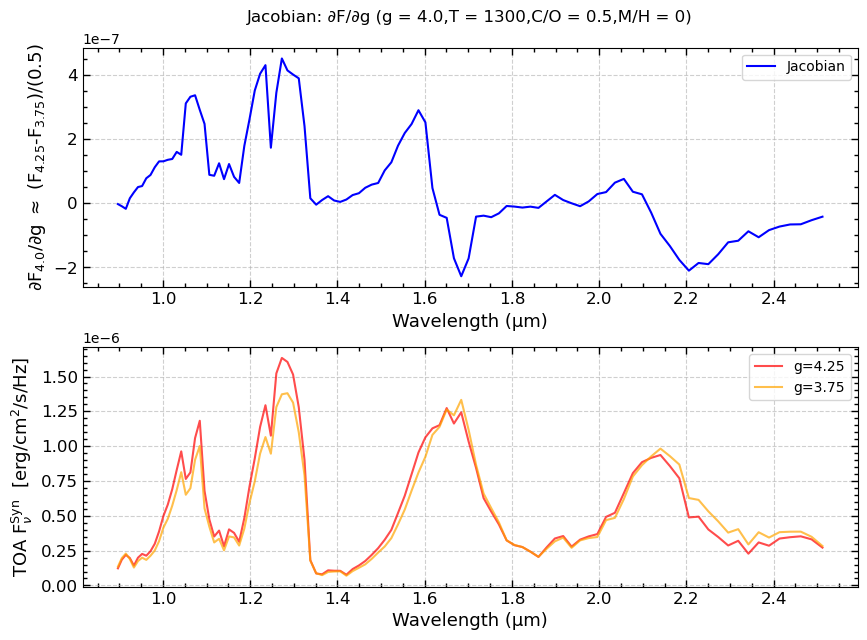

In [10]:
const_dict = {'temperature':1300,
    'gravity':4.0,
    'c_o_ratio':0.5,
    'metallicity':0}

if __load__:
    gravity_jacobian = matrices_dict["gravity"]
    
delta_flux_delta_J(gravity_jacobian,
                   "gravity",
                   dataset, 
                   wl,
                   const_dict = const_dict,
                   logscale=False)

### Metallicity

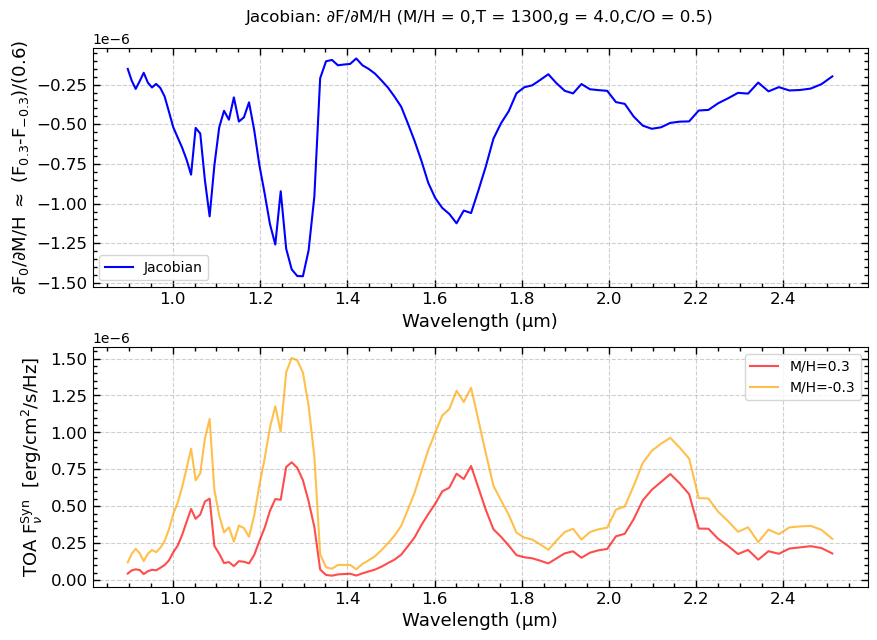

In [11]:
const_dict = {'temperature':1300,
    'gravity':4.0,
    'c_o_ratio':0.5,
    'metallicity':0}

if __load__:
    metallicity_jacobian = matrices_dict["metallicity"]

delta_flux_delta_J(metallicity_jacobian,
                   "metallicity",
                   dataset, 
                   wl,
                   const_dict = const_dict,
                   logscale=False)

### C/O Ratio

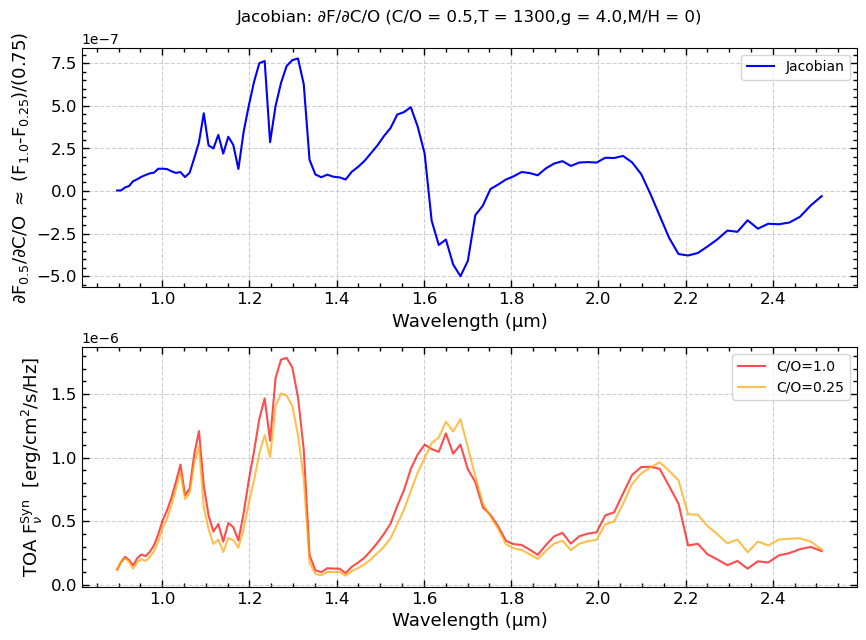

In [12]:
const_dict = {'temperature':1300,
    'gravity':4.0,
    'c_o_ratio':0.5,
    'metallicity':0}

if __load__:
    c_o_ratio_jacobian = matrices_dict["c_o_ratio"]

delta_flux_delta_J(c_o_ratio_jacobian,
                   "c_o_ratio",
                   dataset, 
                   wl,
                   const_dict = const_dict,
                   logscale=False)